#Thyroid Disease Dataset

###HAZIRLAYAN - AUTHOR
Serhat Kaya

[LinkedIn](https://www.linkedin.com/in/serhat-kaya-3a54801b8)

[Instagram](https://www.instagram.com/serhatkaya_68/)




###Genel Bakış
Bu proje, tiroid hastalığını çeşitli makine öğrenimi modelleri kullanarak sınıflandırmayı amaçlamaktadır. Veri seti, hastaların tıbbi geçmişleri, tiroid fonksiyonları, fiziksel muayene sonuçları ve patoloji raporlarını içermektedir. Amaç, bir hastanın tekrar tiroid sorunu yaşayıp yaşamayacağını tahmin etmektir.

Modeller eğitilir, değerler doğrultusunda bu sorun için kullanılabilecek en iyi model belirlenir. Bahsedilen problem hakkında bu modelden faydalanılabilir.


#Veri Seti
Veri seti aşağıdaki özelliklerden oluşmaktadır:

**Yaş**: Hastanın yaşı

**Cinsiyet**: Hastanın cinsiyeti

**Sigara Kullanımı**: Sigara kullanımı durumu

**Sigara Geçmişi**: Sigara geçmişi

**Radyoterapi Geçmişi**: Radyoterapi geçmişi

**Tiroid Fonksiyonu**: Tiroid fonksiyon durumu (ötiroid, hipertiroid vb.)

**Fiziksel Muayene**: Fiziksel muayene sırasında bulunan nodüler guatr türü

**Adenopati**: Adenopati varlığı

**Patoloji**: Patolojik bulgular (örneğin, mikropapiller)

**Fokalite**: Patolojinin tek odaklı mı yoksa çok odaklı mı olduğu

**Risk**: Risk seviyesi

**T**: Tümör boyutu sınıflandırması

**N**: Lenf nodu tutulumu

**M**: Metastaz durumu

**Evre**: Hastalığın evresi

**Yanıt**: Tedaviye başlangıç yanıtı (Mükemmel, Belirsiz vb.)

**Nüks**: Hastalığın tekrar edip etmediği (hedef değişken)

#Model Eğitimi. Çeşitli makine öğrenimi modellerini eğitme
Logistic Regression

K-Nearest Neighbors

Decision Tree

Random Forest

Support Vector Machine

Naive Bayes

Linear Discriminant Analysis

Gradient Boosting Classifier

AdaBoost Classifier

MLP Classifier

XGBoost

**Model Değerlendirme**: Her modeli doğruluk, kesinlik, geri çağırma, F1 skoru, ROC AUC
skoru ve karmaşıklık matrisi kullanarak değerlendirme.

**Model Seçimi**: Değerlendirme metriklerine göre en iyi performans gösteren modeli seçme.

**Yeni Veriler Üzerinde Tahmin**: En iyi modeli kullanarak yeni veriler üzerinde tahmin
yapma.

**Görselleştirmeler**: En iyi model için karmaşıklık matrisi ve ROC eğrisi oluşturma ve
gösterme.

#Gerekli kütüphanelerin yüklenmesi
Bu kod hücresinde, veri işleme ve görselleştirme için gerekli kütüphaneler yüklenir ve uyarılar gizlenir.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

#Veriyi yükleme ve ilk inceleme
Bu kod hücresinde, bir CSV dosyasından veri okunur ve ilk 5 satır ve son 5 satır df DataFrame'inde görüntülenir.


In [21]:
# Veri setini okuma
data_path = ".csv"  # Veri setinin yolu
df = pd.read_csv(data_path)

#Veri setinin ilk 5 gözlemi
Bu kod hücresinde, kullanılan veri setinin ilk 5 satırı gözlemlenir.

In [22]:
df.head()  # Veri setinin ilk gözlemi

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


#Veri setinin son 5 gözlemi
Bu kod hücresinde, kullanılan veri setinin son 5 satırı gözlemlenir.

In [23]:
df.tail() #Veri setinin son 5 gözlemi

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


#Veri seti hakkında genel bilgiler
Bu kod hücresinde, kullanılan veri seti hakkında genel bilgiler görüntülenir.

In [24]:
df.info()  # Verinin genel bilgileri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

#Veri seti'nin istatistiksel özeti
Bu kod hücresinde, kullanılan veri setinin özeti görüntülenir.

In [25]:
df.describe() # İstatistiksel özet

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


#Veri özellekleri,etiket türleri ve veri şekli
Bu kod hücresinde, kullanılan veri setinin başlıkları, asıl etiket türü, satır ve sütun sayısı print ile görüntülenmektedir.

In [26]:
# Diğer Veri özelliklerini ve etiket türlerini yazdırma
print("Özellikler:", df.columns[:-1].tolist())
print("Etiket Türleri:", df.columns[-1])
print("Veri Şekli:", df.shape)

Özellikler: ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']
Etiket Türleri: Recurred
Veri Şekli: (383, 17)


In [27]:
# Eksik değerleri kontrol etme
missing_values = df.isnull().sum()
print("\nEksik Değerler:\n")
missing_values[missing_values > 0]


Eksik Değerler:



,0


#Kategorik verileri işlemek ve modellemeye hazır hale getirmek
Kategorik verilerin makine öğrenimi modellerinde kullanılabilmesi için veriyi sayısal hale getiriyor. Recurred sütunu hedef değişken olarak label encoding ile 0 ve 1'e dönüştürülürken, diğer kategorik sütunlar One-Hot Encoding yöntemi ile sayısal hale getiriliyor.

In [35]:
# Kategorik verileri encode etme
if 'Recurred' in df.columns:
  # Check if the 'Recurred' column is of object (string) type
  if df['Recurred'].dtype == object:
    df["Recurred"] = df["Recurred"].str.lower().str.strip().replace({'no': 0, 'yes': 1}).infer_objects().astype(int)
  else:
    # If not of object type, assume it's already numerical and replace directly
    df["Recurred"] = df["Recurred"].replace({'no': 0, 'yes': 1}).astype(int)
else:
    print("Recurred sütunu bulunamadı. Mevcut sütunlar:", df.columns)
# Kategorik sütunların adlarını alma
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
if 'Recurred' in categorical_columns:
    categorical_columns.remove('Recurred')  # Hedef değişkeni çıkar

# One-hot encoding uygulama
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Özellik ve hedef değişkenleri ayırma
X = df.drop(columns=['Recurred'])
y = df['Recurred']



#Farklı makine öğrenimi modellerini eğitme, tahmin yaptırma, karmaşık matris ve özellik önemi çizimi
Bu kod hücresinde, farklı makine öğrenimi modellerini kullanarak veri seti üzerinde eğitim ve test işlemleri yapılıyor.

Veriler eğitim (training) ve test (testing) setlerine ayrılır.

Özelliklerin birbirine kıyasla daha uygun ölçeklerde olmasını sağlamak için StandartScaler kullanılır.

Farklı makine öğrenimi algoritmaları bir sözlük içinde tanımlanır. Bu algoritmalar, sınıflandırma problemleri çözmek için kullanılır.

Eğitilen modellerin performans metrikleri (accuracy,precision,recall,f1,roc_auc) hesaplanır. Son olarak da modellerin performans metrikleri yazdırılır.

Eğitilen modellerin karmaşık (Confusoin) matris çizdirilir.

Eğitilen modellerin özellik önemi hesaplanır ve çizdirilir.



Model: Logistic Regression
Doğruluk: 0.9610
Hassasiyet: 0.9608
Geri Çağırma: 0.9610
F1 Skoru: 0.9607
ROC AUC Skoru: 0.9936


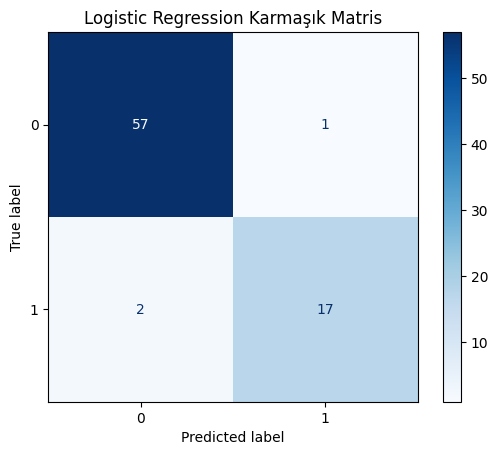


Model: K-Nearest Neighbors
Doğruluk: 0.9481
Hassasiyet: 0.9514
Geri Çağırma: 0.9481
F1 Skoru: 0.9459
ROC AUC Skoru: 0.9437


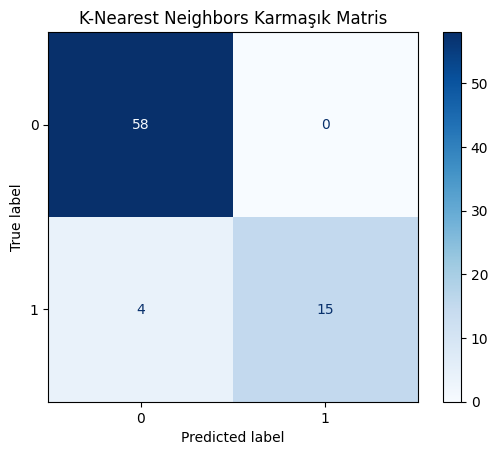


Model: Decision Tree
Doğruluk: 0.9351
Hassasiyet: 0.9414
Geri Çağırma: 0.9351
F1 Skoru: 0.9366
ROC AUC Skoru: 0.9392


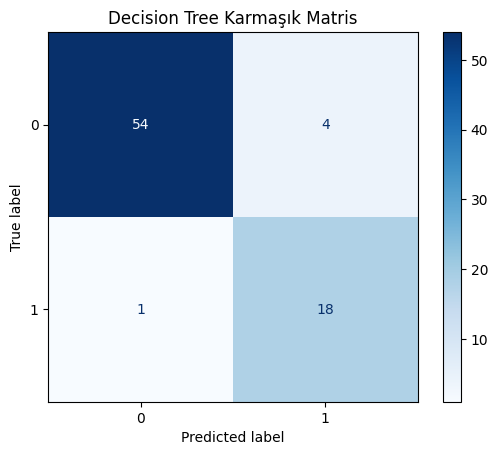

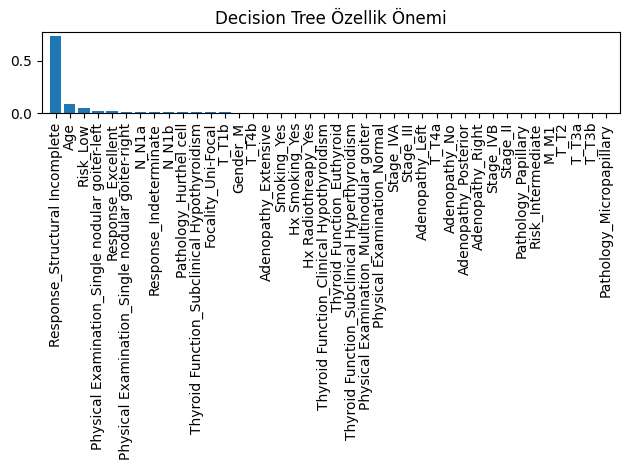


Model: Random Forest
Doğruluk: 0.9870
Hassasiyet: 0.9872
Geri Çağırma: 0.9870
F1 Skoru: 0.9869
ROC AUC Skoru: 0.9959


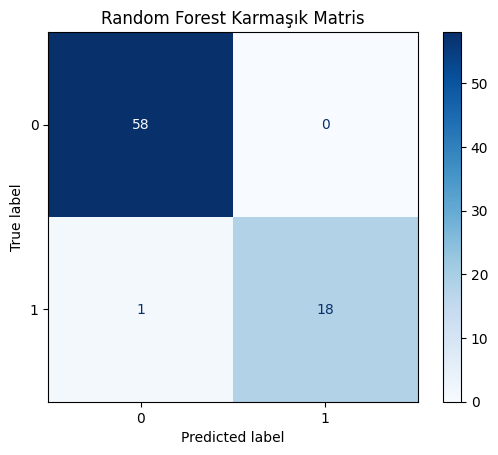

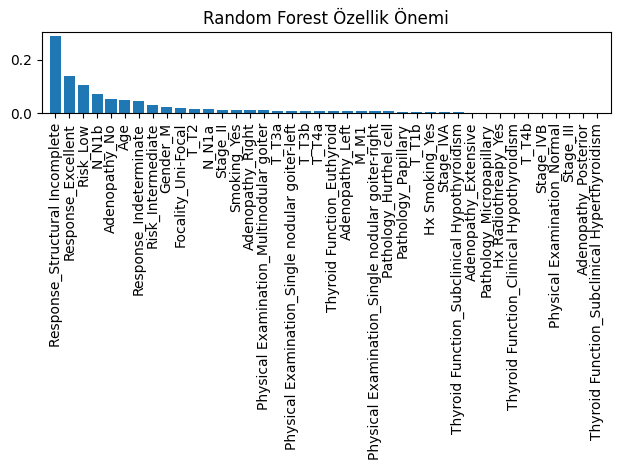


Model: Support Vector Machine
Doğruluk: 0.9870
Hassasiyet: 0.9872
Geri Çağırma: 0.9870
F1 Skoru: 0.9869
ROC AUC Skoru: 0.9909


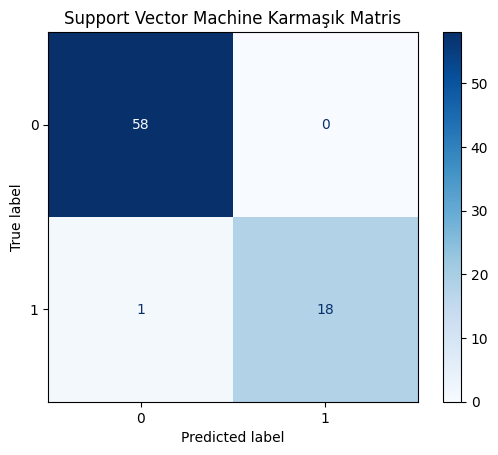


Model: Naive Bayes
Doğruluk: 0.8442
Hassasiyet: 0.8507
Geri Çağırma: 0.8442
F1 Skoru: 0.8225
ROC AUC Skoru: 0.9787


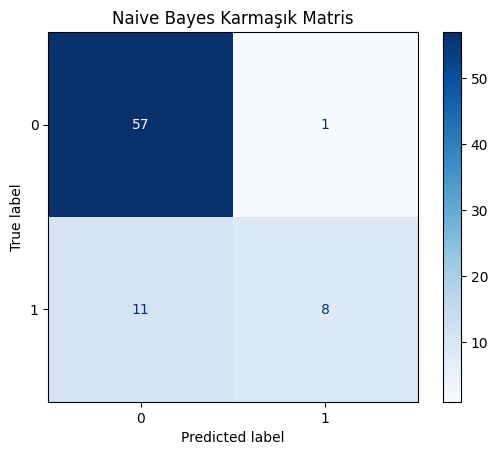


Model: Linear Discriminant Analysis
Doğruluk: 0.9610
Hassasiyet: 0.9630
Geri Çağırma: 0.9610
F1 Skoru: 0.9599
ROC AUC Skoru: 0.9964


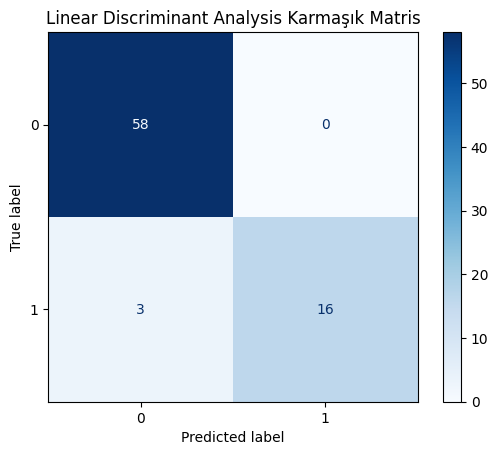


Model: Gradient Boosting
Doğruluk: 0.9740
Hassasiyet: 0.9740
Geri Çağırma: 0.9740
F1 Skoru: 0.9740
ROC AUC Skoru: 0.9936


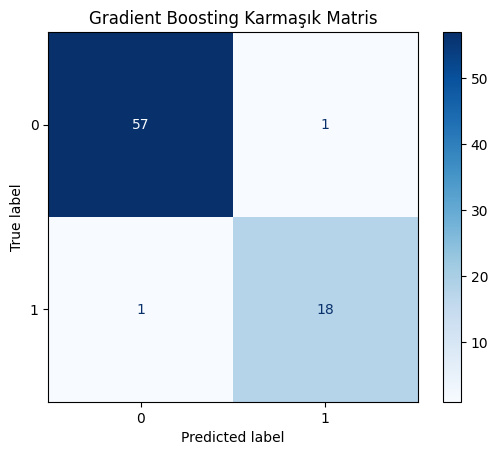

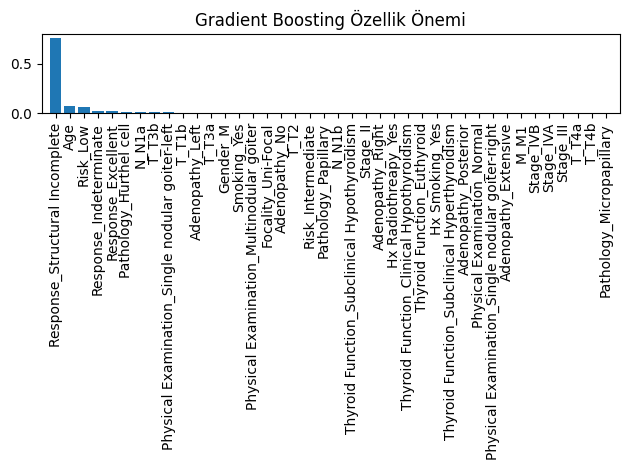


Model: AdaBoost
Doğruluk: 0.9481
Hassasiyet: 0.9481
Geri Çağırma: 0.9481
F1 Skoru: 0.9481
ROC AUC Skoru: 0.9918


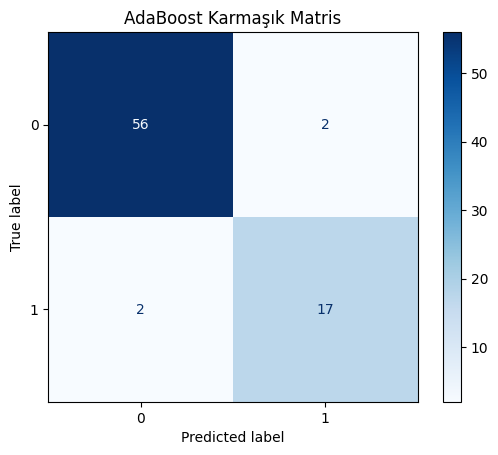

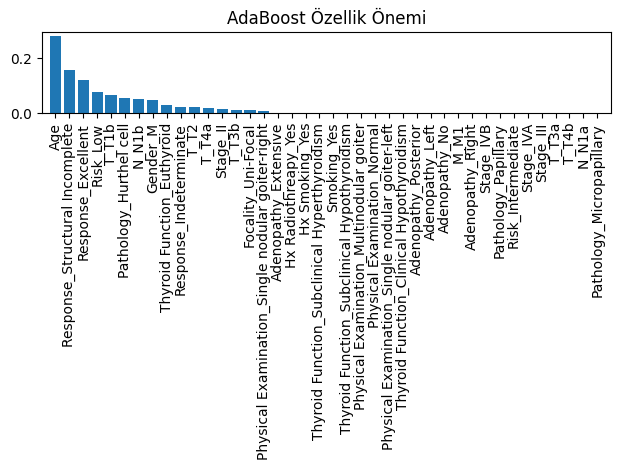


Model: MLP Classifier
Doğruluk: 0.9481
Hassasiyet: 0.9481
Geri Çağırma: 0.9481
F1 Skoru: 0.9481
ROC AUC Skoru: 0.9927


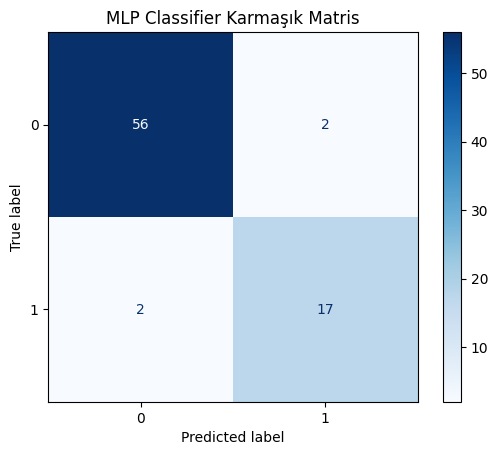

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:01:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Doğruluk: 0.9740
Hassasiyet: 0.9740
Geri Çağırma: 0.9740
F1 Skoru: 0.9740
ROC AUC Skoru: 0.9982


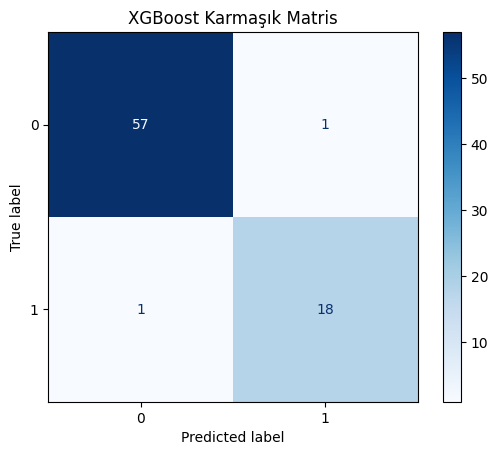

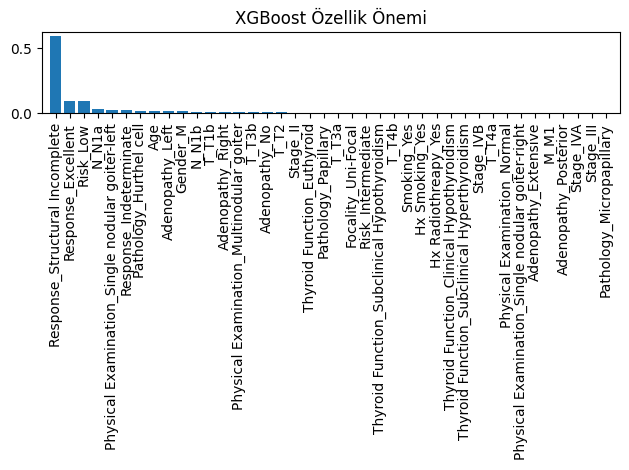

In [42]:
# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelleri tanımlama
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
    "MLP Classifier": MLPClassifier(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Performans metriklerini saklamak için boş bir sözlük
performance_metrics = {}

# Modelleri eğitme ve tahmin yapma
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Performans metrikleri hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None

    performance_metrics[name] = {
        "Doğruluk": accuracy,
        "Hassasiyet": precision,
        "Geri Çağırma": recall,
        "F1 Skoru": f1,
        "ROC AUC Skoru": roc_auc,
    }

    # Sonuçları yazdırma
    print(f"\nModel: {name}")
    print(f"Doğruluk: {accuracy:.4f}")
    print(f"Hassasiyet: {precision:.4f}")
    print(f"Geri Çağırma: {recall:.4f}")
    print(f"F1 Skoru: {f1:.4f}")
    print(f"ROC AUC Skoru: {roc_auc:.4f}" if roc_auc is not None else "ROC AUC Skoru: Hesaplanamadı")

   # Karmaşık matris
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} Karmaşık Matris")
    plt.show()
      # Özellik önemi hesaplama ve görselleştirme
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure()
        plt.title(f"{name} Özellik Önemi")
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.tight_layout()
        plt.show()

#ROC Eğrisi
Bu kod hücresinde, eğitilen modeller için genel bir rock eğrisi çizilir. Bütün modeller eğri içerisinde değerlendirilmektedir.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:02:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


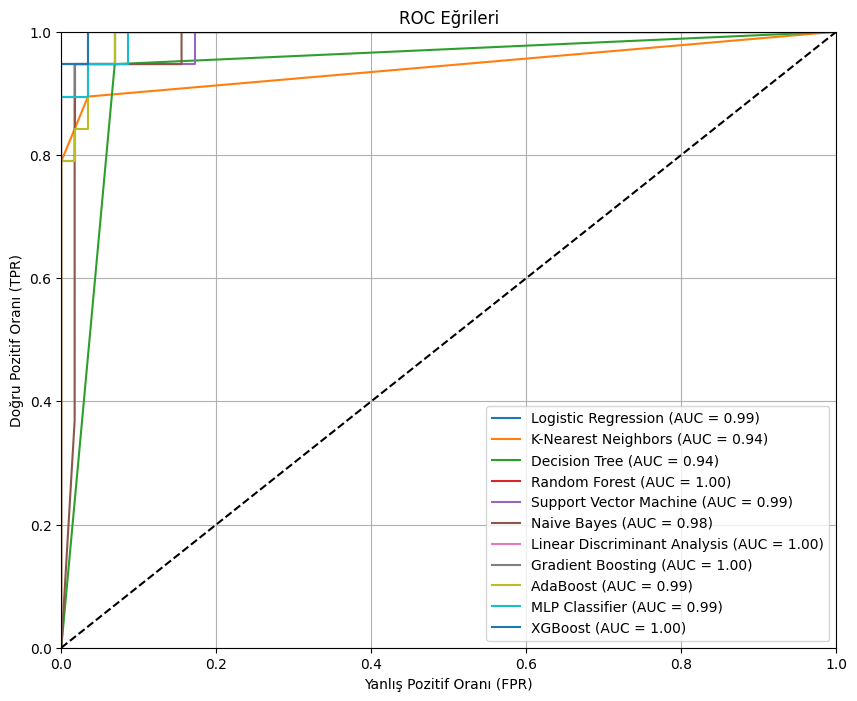

In [43]:
# ROC eğrisi için grafik ayarları
plt.figure(figsize=(10, 8))
plt.title('ROC Eğrileri')

# Modelleri eğitme ve ROC eğrilerini çizme
for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]  # Pozitif sınıfın olasılıkları
    fpr, tpr, _ = roc_curve(y_test, y_prob)  # ROC eğrisi için false positive rate ve true positive rate
    roc_auc = roc_auc_score(y_test, y_prob)  # ROC AUC skoru
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Grafik detayları
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal çizgi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Yanlış Pozitif Oranı (FPR)')
plt.ylabel('Doğru Pozitif Oranı (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#En iyi modeli seçme ve özellik önemini çizme
Eğitilen modeller arasından performans metrikleri hesaplanarak en iyi model seçilir. Seçilen bu modelin performans metrik bilgileri yazdırılır ve eğer ki özellik önemine sahip bir model ise özellik önemi çizdirilir.

En iyi model: Random Forest - F1 Skoru: 0.9869 - Doğruluk: 0.9870 - Hassasiyet: 0.9872 - Geri Çağırma: 0.9870 - ROC AUC: 0.9959


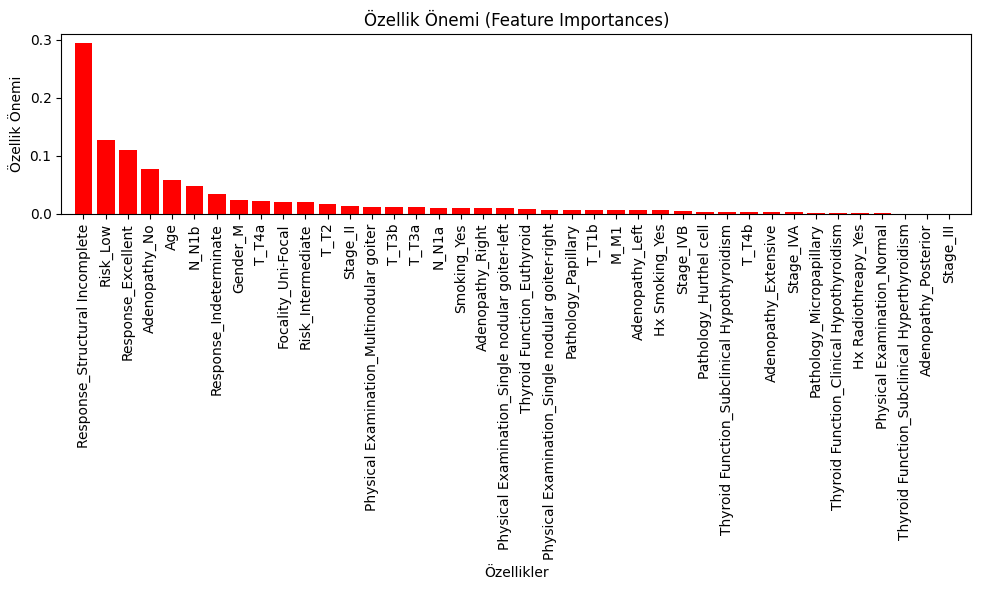

In [44]:
# En iyi modeli belirleme (F1 skorunu kullanarak)
best_model_name = max(performance_metrics, key=lambda k: performance_metrics[k]["F1 Skoru"])
best_model_metrics = performance_metrics[best_model_name]

print(f"En iyi model: {best_model_name} - F1 Skoru: {best_model_metrics['F1 Skoru']:.4f} - Doğruluk: {best_model_metrics['Doğruluk']:.4f} - Hassasiyet: {best_model_metrics['Hassasiyet']:.4f} - Geri Çağırma: {best_model_metrics['Geri Çağırma']:.4f} - ROC AUC: {best_model_metrics['ROC AUC Skoru']:.4f}")

# En iyi modelin özellik önemini çizme
if isinstance(models[best_model_name], RandomForestClassifier):
    importances = models[best_model_name].feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Özellik Önemi (Feature Importances)")
    plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.xlabel("Özellikler")
    plt.ylabel("Özellik Önemi")
    plt.tight_layout()
    plt.show()
else:
    print("Özellik önemi grafiği sadece Rastgele Orman modelleri için desteklenmektedir.")